In [5]:
import pandas as pd
import plotly.express as px

In [14]:
import plotly.express as px
iris = px.data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [35]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_id        int64
dtype: object

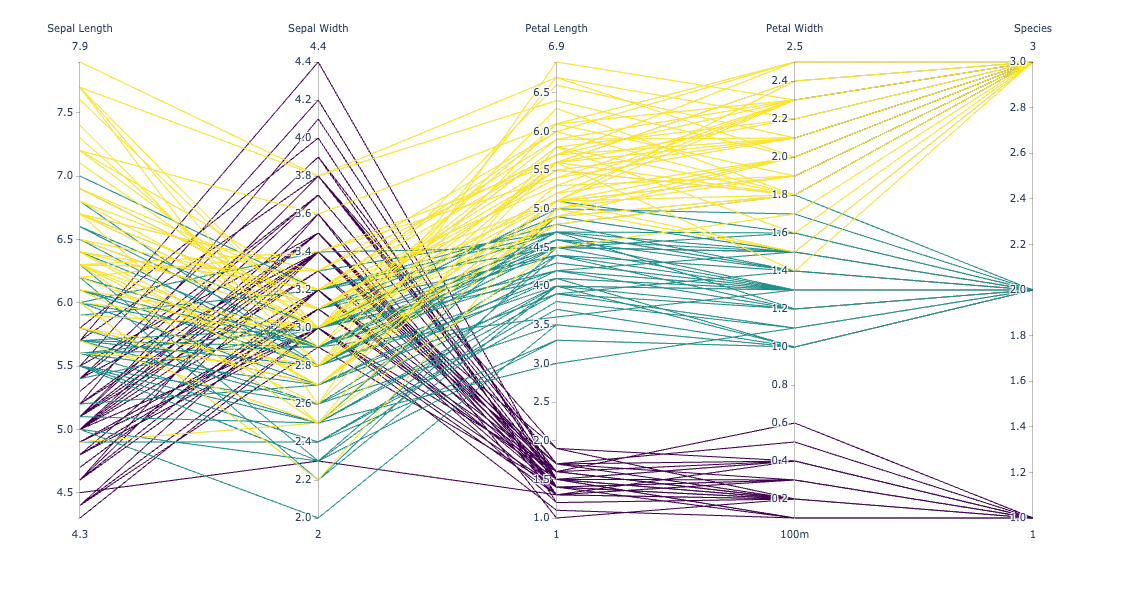

In [80]:
iris = px.data.iris()
fig = px.parallel_coordinates(iris, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

# 1. Data

In [133]:
df = pd.read_csv("cars_make.csv")

# we need the names as ints to be able to use to color code
df.name = df.name.astype('category')
df["name_id"] = df.name.cat.codes


print(df.dtypes)
df.head()

name                 category
economy (mpg)         float64
cylinders               int64
displacement (cc)     float64
power (hp)            float64
weight (lb)             int64
0-60 mph (s)          float64
year                    int64
name_id                  int8
dtype: object


,name,economy (mpg),cylinders,displacement (cc),power (hp),weight (lb),0-60 mph (s),year,name_id
0,AMC,13.0,8,360.0,175.0,3821,11.0,73,0
1,AMC,15.0,8,390.0,190.0,3850,8.5,70,0
2,AMC,17.0,8,304.0,150.0,3672,11.5,72,0
3,AMC,20.2,6,232.0,90.0,3265,18.2,79,0
4,AMC,18.1,6,258.0,120.0,3410,15.1,78,0


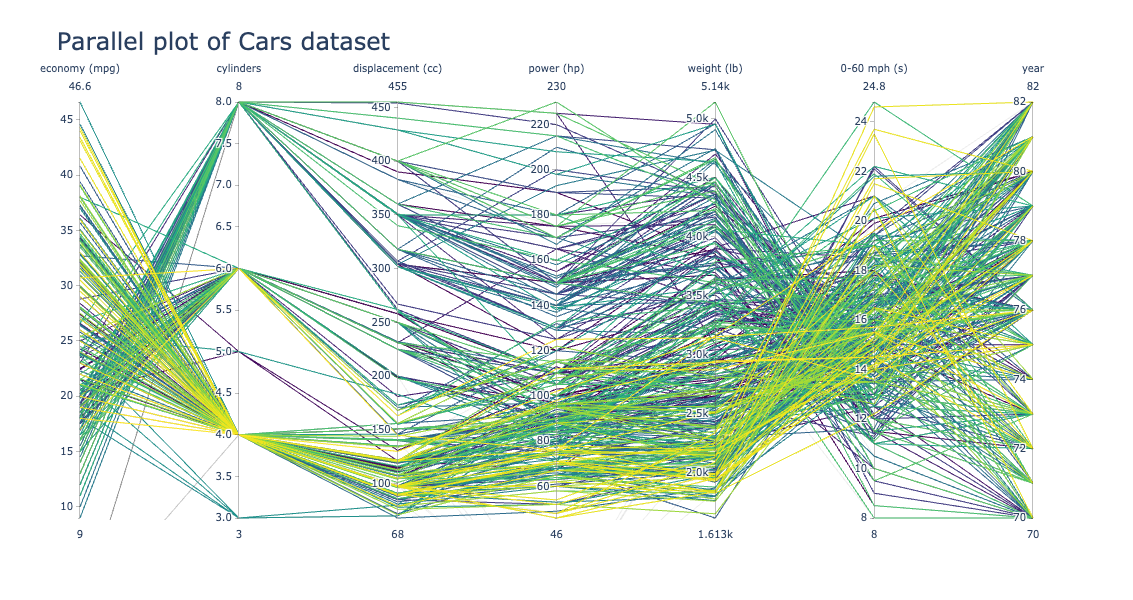

In [134]:
cols = list(df.columns[1:-1])

fig = px.parallel_coordinates(df, dimensions=cols,
                              color='name_id',
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              title="Parallel plot of Cars dataset",
                              ).update_layout(title_font_size=24)

fig

# parallel_categories

The above is quite messy. So I'm going to bin some of the cols and do a parallel categories plot instead.

In [142]:
df["displacement"] = pd.cut(df["displacement (cc)"], bins=3, labels=["small", "medium", "large"])
df['weight'] = pd.cut(df['weight (lb)'], bins=5, labels=["very light", "light", "medium", "heavy", "very heavy"])
df['power'] = pd.cut(df['power (hp)'], bins=6, labels=["weak", "sucks", "ok", "horse", "many horses", "bull"])
df['speed'] = pd.cut(df['0-60 mph (s)'], bins=6, labels=["snail", "slow", "pokey", "can move", "fast", "porsche"])
df.head()

,name,economy (mpg),cylinders,displacement (cc),power (hp),weight (lb),0-60 mph (s),year,name_id,weight,displacement,speed,power
0,AMC,13.0,8,360.0,175.0,3821,11.0,73,0,heavy,large,slow,many horses
1,AMC,15.0,8,390.0,190.0,3850,8.5,70,0,heavy,large,snail,many horses
2,AMC,17.0,8,304.0,150.0,3672,11.5,72,0,medium,medium,slow,horse
3,AMC,20.2,6,232.0,90.0,3265,18.2,79,0,medium,medium,can move,sucks
4,AMC,18.1,6,258.0,120.0,3410,15.1,78,0,medium,medium,pokey,ok


In [147]:
df.head(1)

,name,economy (mpg),cylinders,displacement (cc),power (hp),weight (lb),0-60 mph (s),year,name_id,weight,displacement,speed,power
0,AMC,13.0,8,360.0,175.0,3821,11.0,73,0,heavy,large,slow,many horses


In [151]:
cols = ['name_id', 'cylinders', 'displacement', 'power', 'speed', 'weight', 'year']
cols

['name_id', 'cylinders', 'displacement', 'power', 'speed', 'weight', 'year']

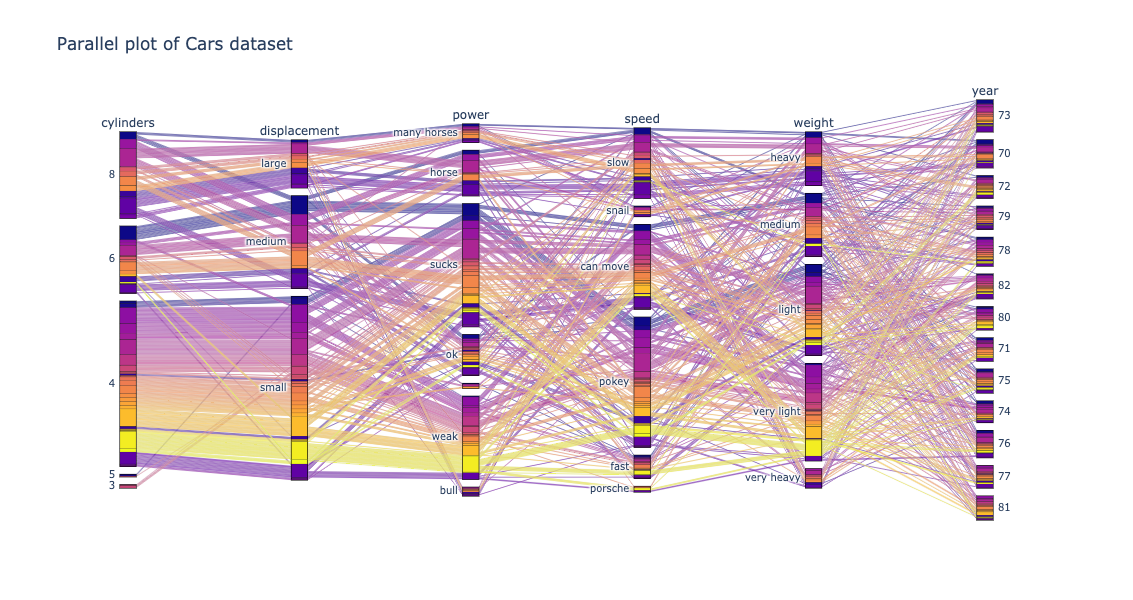

In [154]:


fig2 = px.parallel_categories(df[cols], 
                              color='name_id',
                        color_continuous_scale=px.colors.diverging.Armyrose,
                                  color_continuous_midpoint=20,
                        title="Parallel plot of Cars dataset")

fig2